In [0]:
from google.colab import files
uploaded = files.upload()

**Problem : Building Artificial Neural Networks( 3 and 5 layers) to predict house prices.**

In [0]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [0]:
#READING DATA
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))


**Data Analysis**

In [71]:
#Size of data
print('Size of training data :', train.shape)
print('Size of test data :', test.shape)


Size of training data : (1460, 81)
Size of test data : (1459, 80)


In [72]:
#Data information
train.info()
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Skew is : 1.8828757597682129


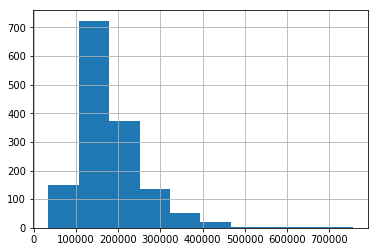

In [73]:
#Plotting Dependent variable "SalePrice" and calculating skewness
plt.grid(True)
print('Skew is :',train.SalePrice.skew())
plt.hist(train.SalePrice)
plt.show()


Skew is : 0.12133506220520406


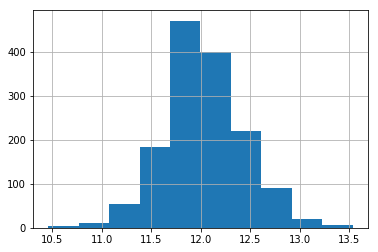

In [74]:
#Scaling using np.log() and recalculating skewness
target = np.log(train.SalePrice) 
plt.grid(True)
print('Skew is :',target.skew())
plt.hist(target)
plt.show()

We observed skewness is lower in np.log() scaled version

In [75]:
#Creating a subset of columns in training set having numerical datatypes
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes


Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

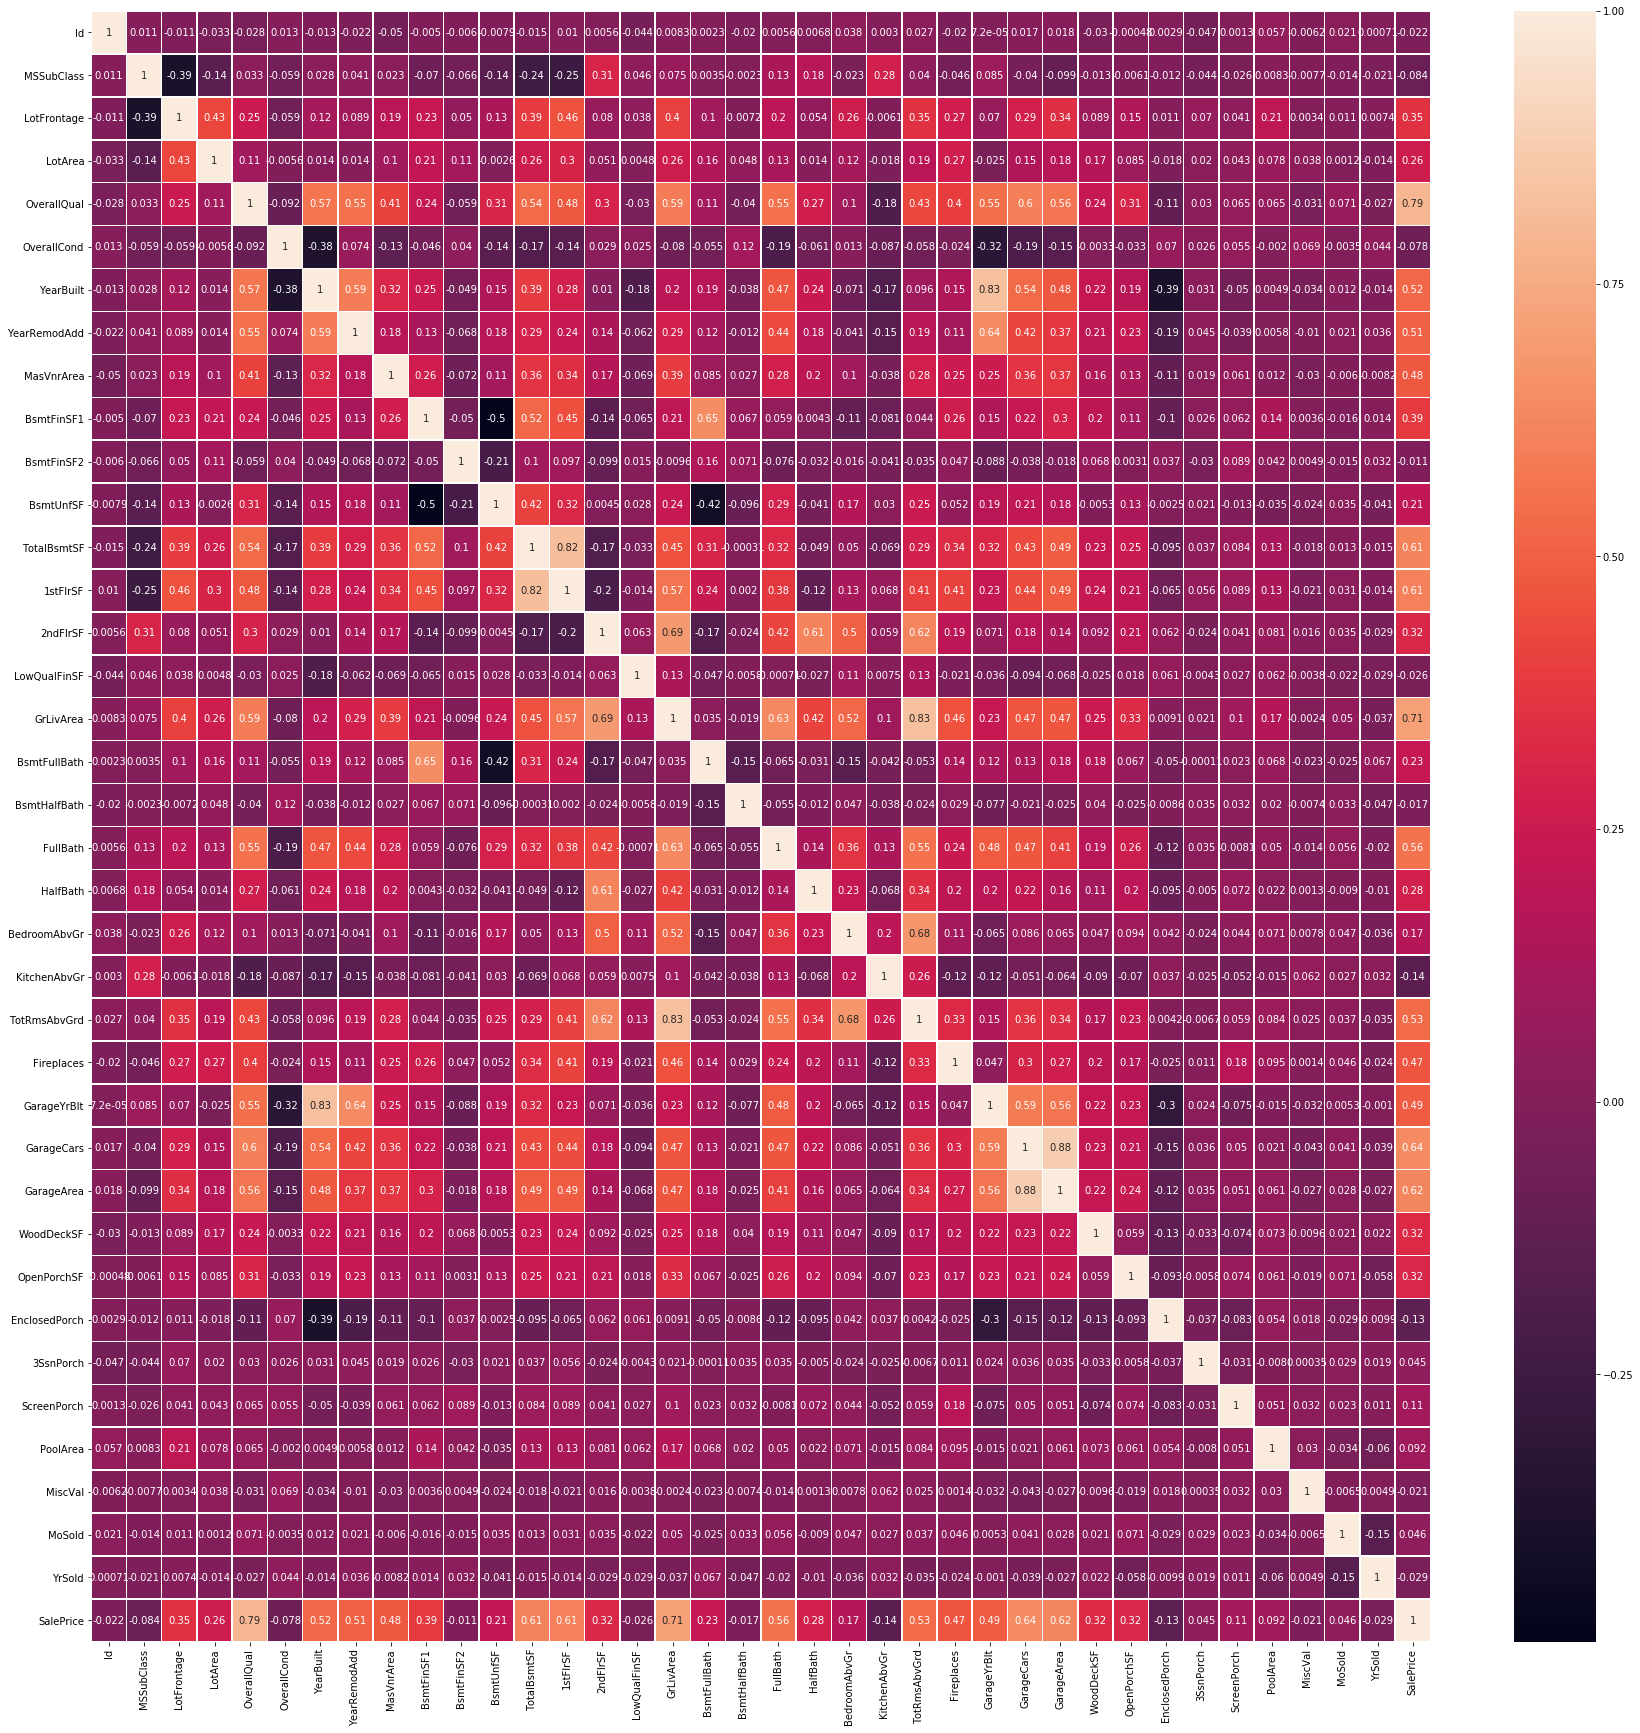

In [76]:
#Displayng the correlation between the columns using heatmap and examine the correlations between the features and the target(SalePrice).
corr = numeric_features.corr()
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(corr,annot=True, linewidth = 0.5, ax = ax)


Values closer to 1 are more correlated to the dependent variable SalePrice

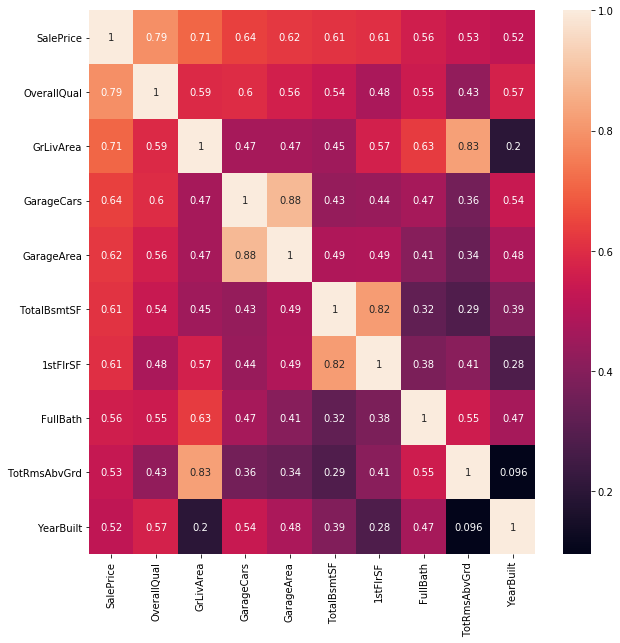

In [77]:
#Heatmap of 10 most correlated features 
max_corr = corr.nlargest(10,'SalePrice')['SalePrice'].index
cols = train[max_corr].corr()
plt.figure(figsize=(10,10))
sb.heatmap(cols,annot=True)

In [78]:
#Displaying columns(10) having largest correlation with Dependent variable SalePrice
print(corr['SalePrice'].sort_values(ascending=False)[:11])


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


These are the features that are most correlated to the dependent variable SalePrice 
Overallqual is the most correlated feature.

Investigating top most corelated columns with SalePrice


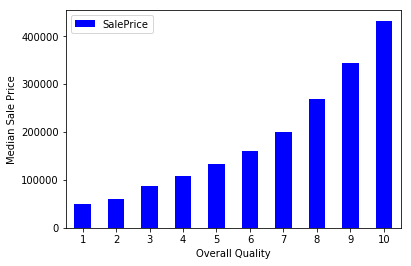

In [79]:
#SalePrice vs OverallQual
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


We can see here higher overall quality results in high price of the property

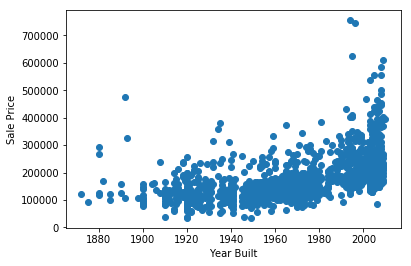

In [80]:
#SalePrice vs YearBuilt 
plt.scatter(x=train['YearBuilt'], y=train.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Year Built')
plt.show()


Here we can observe that older houses have lower prices

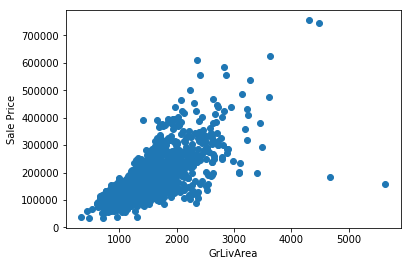

In [81]:
#SalePrice vs GrLivArea
plt.scatter(x=train['GrLivArea'], y=train.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()


Outliners are present 

In [0]:
train = train[train['GrLivArea'] < 4000] #Removing Outliners


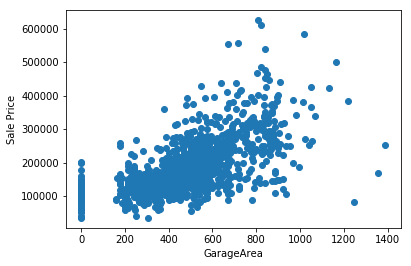

In [84]:
#SalePrice vs GarageArea
plt.scatter(x=train['GarageArea'], y=train.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('GarageArea')
plt.show()


In [0]:
train = train[train['GarageArea'] < 1200] #Removing Outliners


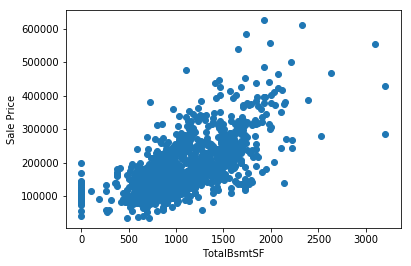

In [86]:
#SalePrice vs TotalBsmtSF
plt.scatter(x=train['TotalBsmtSF'], y=train.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('TotalBsmtSF')
plt.show()


In [0]:
train = train[train['TotalBsmtSF'] < 3000] #Removing Outliners

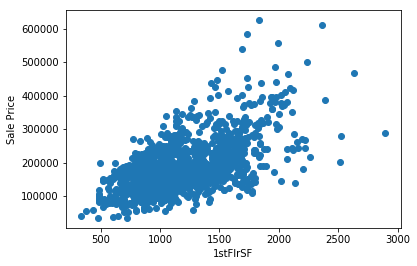

In [88]:
#SalePrice vs 1stFlrSF
plt.scatter(x=train['1stFlrSF'], y=train.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('1stFlrSF')
plt.show()


**Data Preprocessing**

In [0]:
#Rearranging dataframe to numeric data then categorical data
numeric_features = [i for i in train.columns if (train.dtypes[i]=='float64') or (train.dtypes[i]=='int64')]
categorical_features = [i for i in train.columns if train.dtypes[i]=='object']
train = pd.concat([train[numeric_features],train[categorical_features]],axis=1)

numeric_features1 = [i for i in test.columns if (test.dtypes[i]=='float64') or (test.dtypes[i]=='int64')]
categorical_features1 = [i for i in test.columns if test.dtypes[i]=='object']
test = pd.concat([test[numeric_features1],test[categorical_features1]],axis=1)


In [90]:
#Dealing with missing values
from sklearn.preprocessing import Imputer
ip = Imputer(missing_values=np.nan,strategy='mean',axis=0)
num_nf = len(numeric_features) #no of numeric features
ip = ip.fit(train.iloc[:,1:num_nf-1]) #column 0 is ID and last numeric column is SalePrice these both are excluded as there would be no missing values
train.iloc[:,1:(num_nf-1)] = ip.transform(train.iloc[:,1:(num_nf-1)]) 
test.iloc[:,1:(num_nf-1)] = ip.transform(test.iloc[:,1:(num_nf-1)])


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
#Encoding categorical features
dataset = (train.drop('SalePrice', axis = 1)).append(test)     #Combining training set and test set 

for col in categorical_features:
    dummies = pd.get_dummies(dataset[col], prefix = col)
    dataset = pd.concat([dataset, dummies], axis = 1 )
    dataset.drop([col], axis = 1, inplace = True)
dataset.drop(dataset.columns[len(dataset.columns)-1], axis=1, inplace=True)


In [0]:
#Splitting into training set and Test set
x_train = dataset.iloc[0:1449, :].values
x_test = dataset.iloc[1449: , :].values
y_train = train['SalePrice'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2)

In [0]:

#Scaling Data in training set and test set
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

maxprice = train['SalePrice'].max()
y_train = y_train/maxprice



**Building 3 layers neural network**

In [94]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(output_dim =128, init = 'normal', activation = 'relu', input_dim = 287))
model.add(Dropout(0.10))
model.add(Dense(output_dim = 1, init = 'normal', activation = 'linear'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=287, units=128, kernel_initializer="normal")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="normal")`
  


In [0]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae','mape'])

In [96]:
model.fit(x_train, y_train, batch_size = 20, epochs = 20, verbose = 1)

Epoch 1/20
1159/1159 [==============================] - 1s 877us/step - loss: 0.0156 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 33.4089
Epoch 2/20
1159/1159 [==============================] - 0s 92us/step - loss: 0.0038 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 17.4467
Epoch 3/20
1159/1159 [==============================] - 0s 108us/step - loss: 0.0028 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 14.9323
Epoch 4/20
1159/1159 [==============================] - 0s 99us/step - loss: 0.0024 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 13.8212
Epoch 5/20
1159/1159 [==============================] - 0s 98us/step - loss: 0.0021 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 13.1546
Epoch 6/20
1159/1159 [==============================] - 0s 99us/step - loss: 0.0018 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 11.9434
Epoch 7/20
1159/1159 [==============================] - 0s 99u

So, For training set we got mean_absolute_precentage_error as 7.5457%

In [0]:
y_pred = model.predict(x_test)


Text(0, 0.5, 'Actual Values')

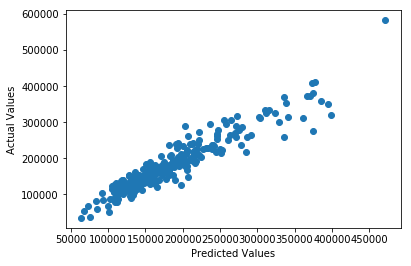

In [104]:
plt.scatter(y_pred*maxprice,y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

So, we can see that in broader view its a straight line between actual values and predicted values.

**Building 5 layers neural networks**

In [106]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(output_dim =128, init = 'normal', activation = 'relu', input_dim = 287))
model.add(Dropout(0.05))
model.add(Dense(output_dim = 128, init = 'normal', activation = 'relu'))
model.add(Dropout(0.05))
model.add(Dense(output_dim = 128, init = 'normal', activation = 'relu'))
model.add(Dropout(0.05))
#Output layer
model.add(Dense(output_dim = 1, init = 'normal', activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae','mape'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=287, units=128, kernel_initializer="normal")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="normal")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="normal")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="normal")`
  


In [107]:
model.fit(x_train, y_train, batch_size = 20, epochs = 20, verbose = 1)


Epoch 1/20
1159/1159 [==============================] - 2s 1ms/step - loss: 0.0120 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 27.2215
Epoch 2/20
1159/1159 [==============================] - 0s 117us/step - loss: 0.0026 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 13.7109
Epoch 3/20
1159/1159 [==============================] - 0s 124us/step - loss: 0.0021 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 12.1548
Epoch 4/20
1159/1159 [==============================] - 0s 118us/step - loss: 0.0017 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 10.7437
Epoch 5/20
1159/1159 [==============================] - 0s 119us/step - loss: 0.0015 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 10.1812
Epoch 6/20
1159/1159 [==============================] - 0s 122us/step - loss: 0.0017 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 10.3691
Epoch 7/20
1159/1159 [==============================] - 0s 1

So, for 5 layers neural network we got mean_absolute_percentage_error as 6.9489%

In [0]:
y_pred = model.predict(x_test)


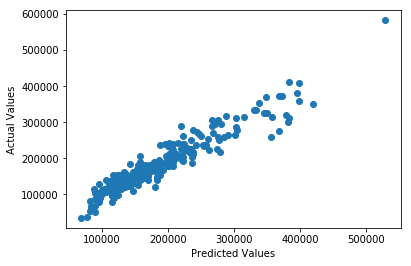

In [110]:
plt.scatter(y_pred*maxprice,y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

This graph shows good prediction of house prices